# Dependencies

In [ ]:
# Installing SciPy latest version to import qmc
# Refer https://stackoverflow.com/questions/68989469/importing-qmc-as-submodule-in-scipy
!pip install scipy==1.7.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Restart runtime after running the above cell and then run it again.

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import qmc    # quasi-Monte Carlo for latin hypercube sampling
from scipy.stats import mstats 
from scipy import stats as stats
from scipy.stats import rv_continuous, rv_histogram
import scipy.optimize as opt

from scipy.stats import norm, weibull_min, beta


import warnings
warnings.filterwarnings("ignore")

#PERT class

In [ ]:
# define a new class pertm_gen: a generator for the PERT distribution

class pertm_gen(rv_continuous):
    '''modified beta_PERT distribution'''

 
    def _shape(self, min, mode, max, lmb):
        s_alpha = 1+ lmb*(mode - min)/(max-min)
        s_beta = 1 + lmb*(max - mode)/(max-min)
        return [s_alpha, s_beta]


    def _cdf(self, x, min, mode, max, lmb):
        s_alpha, s_beta = self._shape(min, mode, max, lmb)
        z = (x - min) / (max - min)
        cdf = beta.cdf(z, s_alpha, s_beta)
        return cdf

    def _ppf(self, p, min, mode, max, lmb):
        s_alpha, s_beta = self._shape(min, mode, max, lmb)
        ppf = beta.ppf(p, s_alpha, s_beta)
        ppf = ppf * (max - min) + min
        return ppf


    def _mean(self, min, mode, max, lmb):
        mean = (min + lmb * mode + max) / (2 + lmb)
        return mean

    def _var(self, min, mode, max, lmb):
        mean = self._mean(min, mode, max, lmb)
        var = (mean - min) * (max - mean) / (lmb + 3)
        return var

    def _skew(self, min, mode, max, lmb):
        mean = self._mean(min, mode, max, lmb)
        skew1 = (min + max - 2*mean) / 4
        skew2 = (mean - min) * (max  - mean)
        skew2 = np.sqrt(7 / skew2)
        skew = skew1 * skew2
        return skew

    def _kurt(self, min, mode, max, lmb):
        a1,a2 = self._shape(min, mode, max, lmb)
        kurt1 = a1 + a2 +1
        kurt2 = 2 * (a1 + a2)**2
        kurt3 = a1 * a2 * (a1 + a2 - 6)
        kurt4 = a1 * a2 * (a1 + a2 + 2) * (a1 + a2 + 3)
        kurt5 = 3 * kurt1 * (kurt2 + kurt3)
        kurt = kurt5 / kurt4 -  3                 # scipy defines kurtosis of std normal distribution as 0 instead of 3
        return kurt

    def _stats(self, min, mode, max, lmb):
        mean = self._mean(min, mode, max, lmb)
        var = self._var(min, mode, max, lmb)
        skew = self._skew(min, mode, max, lmb)
        kurt = self._kurt(min, mode, max, lmb)
        return mean, var, skew, kurt


# Input Variables

In [ ]:
gma = np.array([
[26,27,29],
[26,27,29],
[18,22,29],
[18,19,24]
])

In [ ]:
gma

array([[26, 27, 29],
       [26, 27, 29],
       [18, 22, 29],
       [18, 19, 24]])

In [ ]:
jcs = np.array([
[65,105,175],
[71,130,205],
[68,105,160],
[46,55,100]
])

In [ ]:
jcs

array([[ 65, 105, 175],
       [ 71, 130, 205],
       [ 68, 105, 160],
       [ 46,  55, 100]])

In [ ]:
jrc = np.array([
[3,5,7],
[5,6,8],
[3,6,9],
[1,2,6]
])

In [ ]:
jrc

array([[3, 5, 7],
       [5, 6, 8],
       [3, 6, 9],
       [1, 2, 6]])

In [ ]:
phi_b = np.array([
[29,33,51],
[33,38,51],
[27,33,45],
[34,41,44]
])

In [ ]:
phi_b

array([[29, 33, 51],
       [33, 38, 51],
       [27, 33, 45],
       [34, 41, 44]])

In [ ]:
t = np.array([
[1,5,10],
[1,5,10],
[1,5,10],
[1,5,10]
])

In [ ]:
t

array([[ 1,  5, 10],
       [ 1,  5, 10],
       [ 1,  5, 10],
       [ 1,  5, 10]])

In [ ]:
N = 1000  # random numbers to generate Numsims
numbins = 100 # no of bins for histogram
litho = 4 # lithological indices number
ans = np.empty([litho, N])

# Font

In [ ]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

In [ ]:
!fc-list

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:36
🔁 Restarting kernel...


In [ ]:
!conda activate general_plotting
!conda install -c conda-forge mscorefonts


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.


Solving environment: | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mscorefonts


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       ha878542_0         149 KB  conda-forge
    certifi-2022.6.15          |   py37h89c1867_0         155 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_1         989 KB  conda-forge
    mscorefonts-0.0.1          |                3         3.1 

In [ ]:
rm -fr ~/.cache/matplotlib

In [ ]:
!fc-list

In [ ]:
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

# RUN

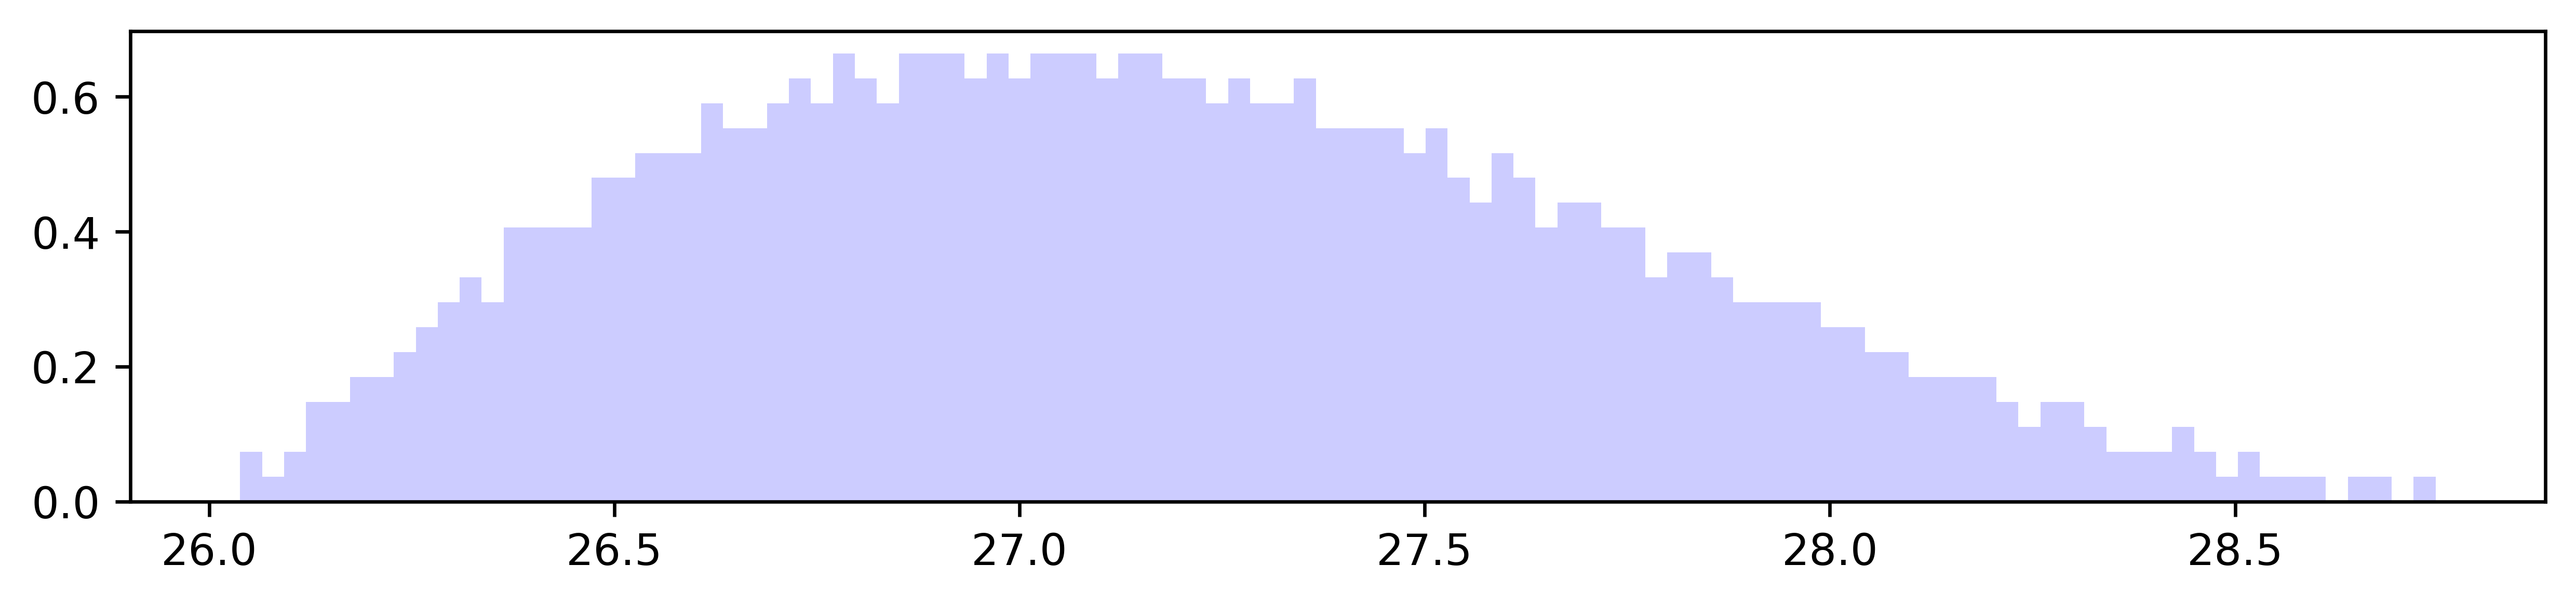

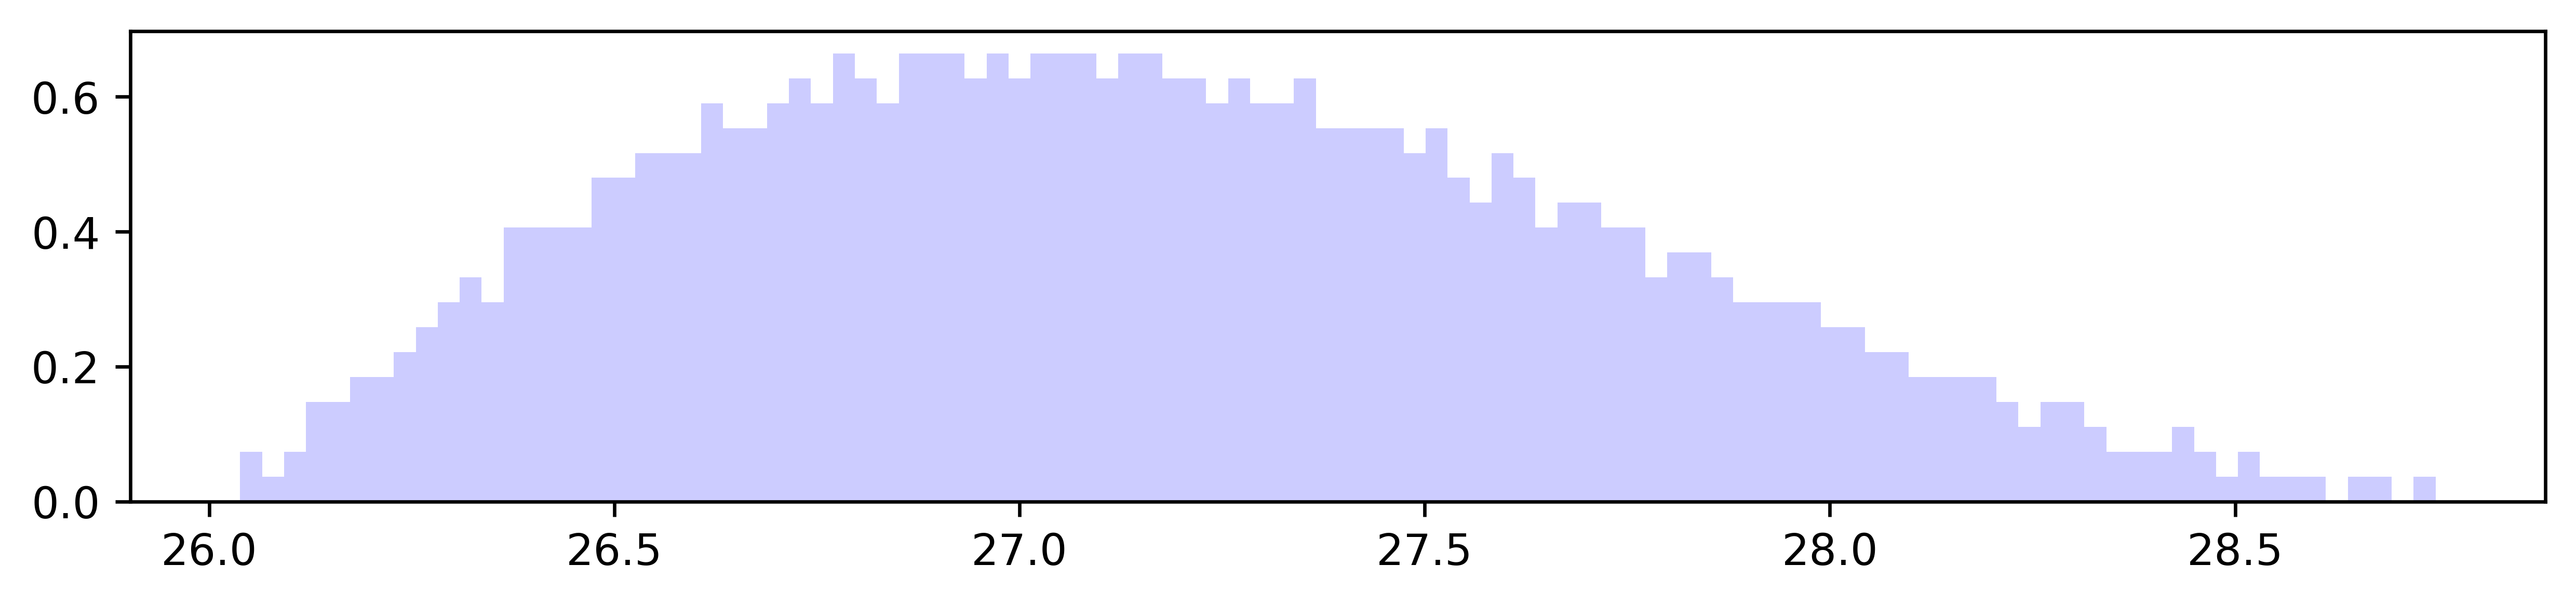

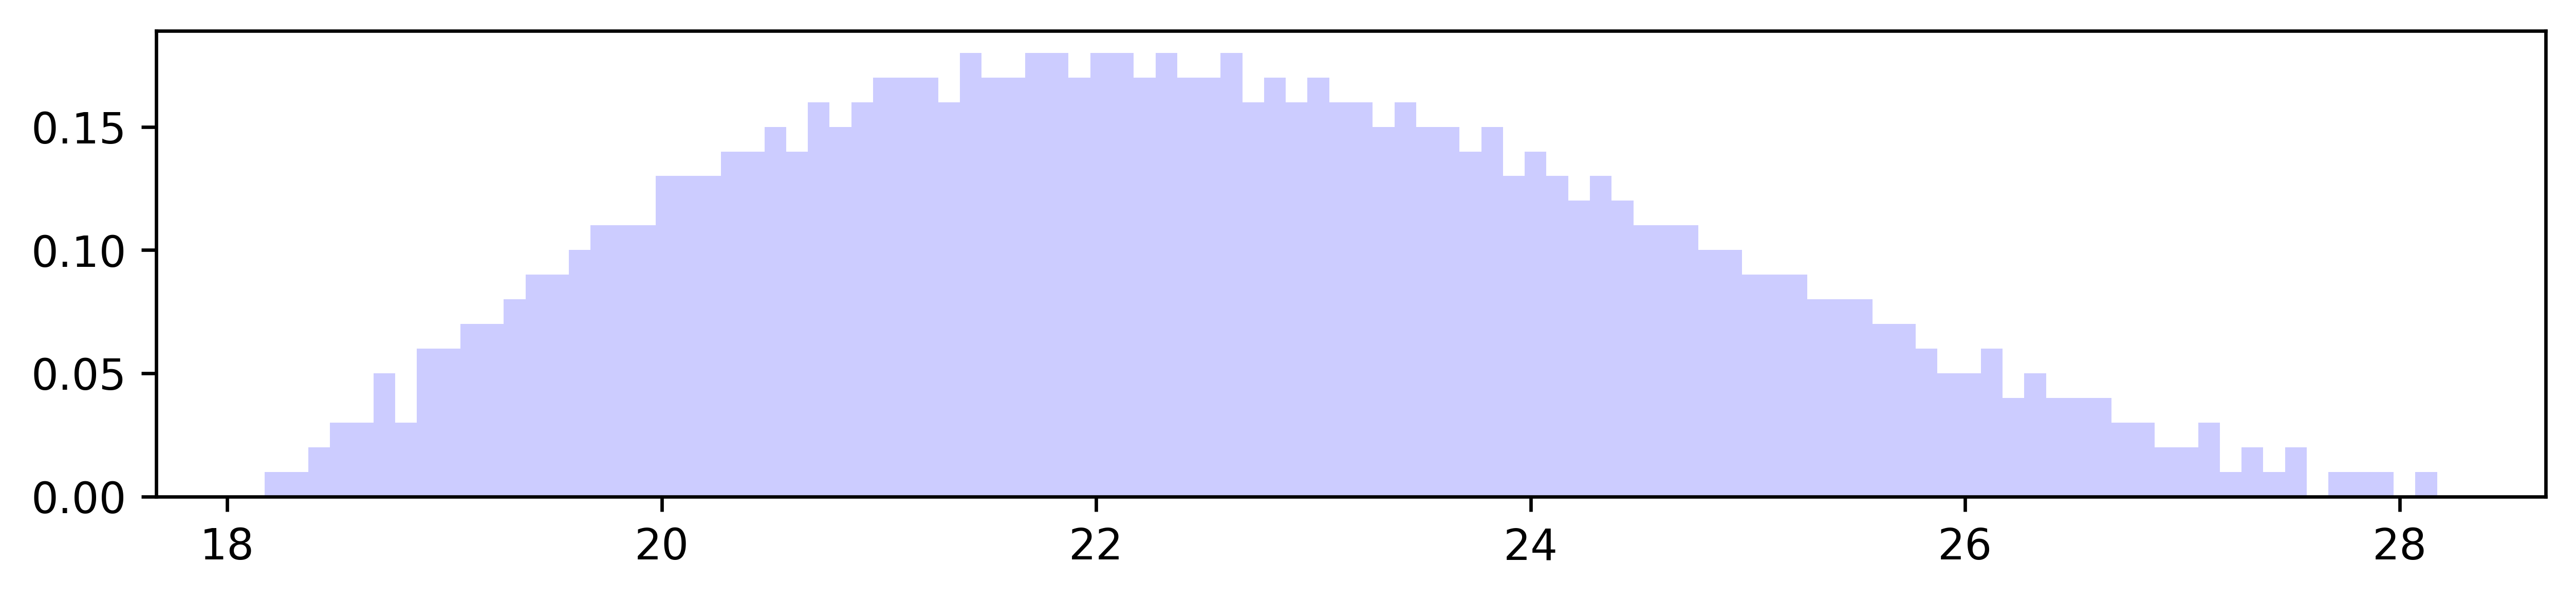

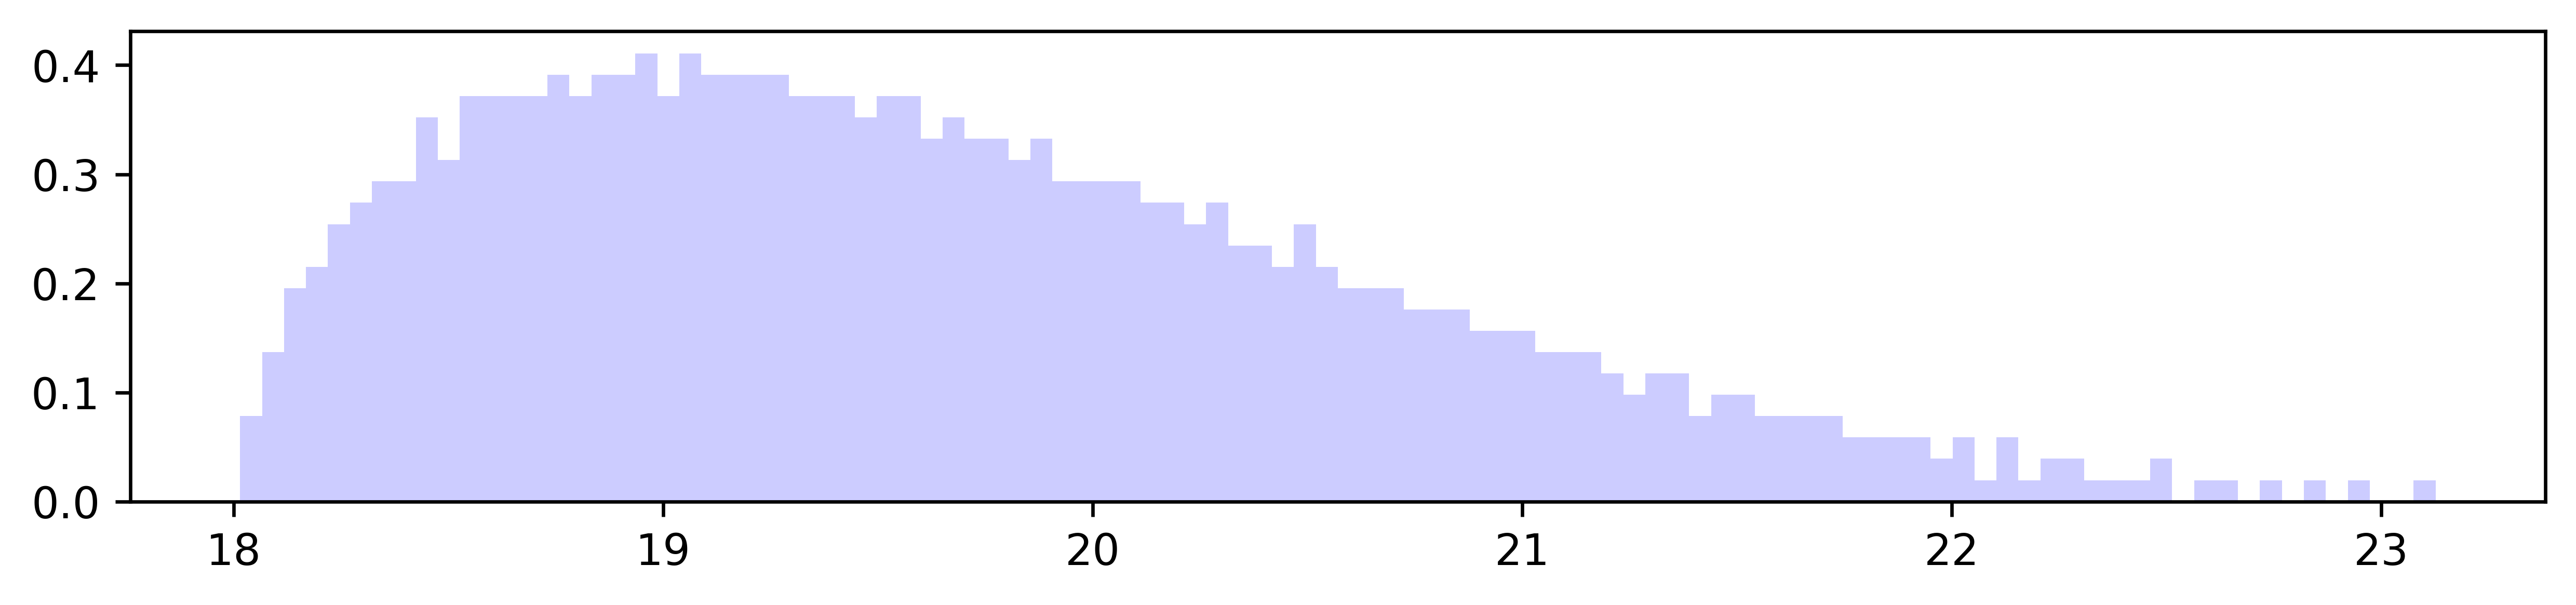

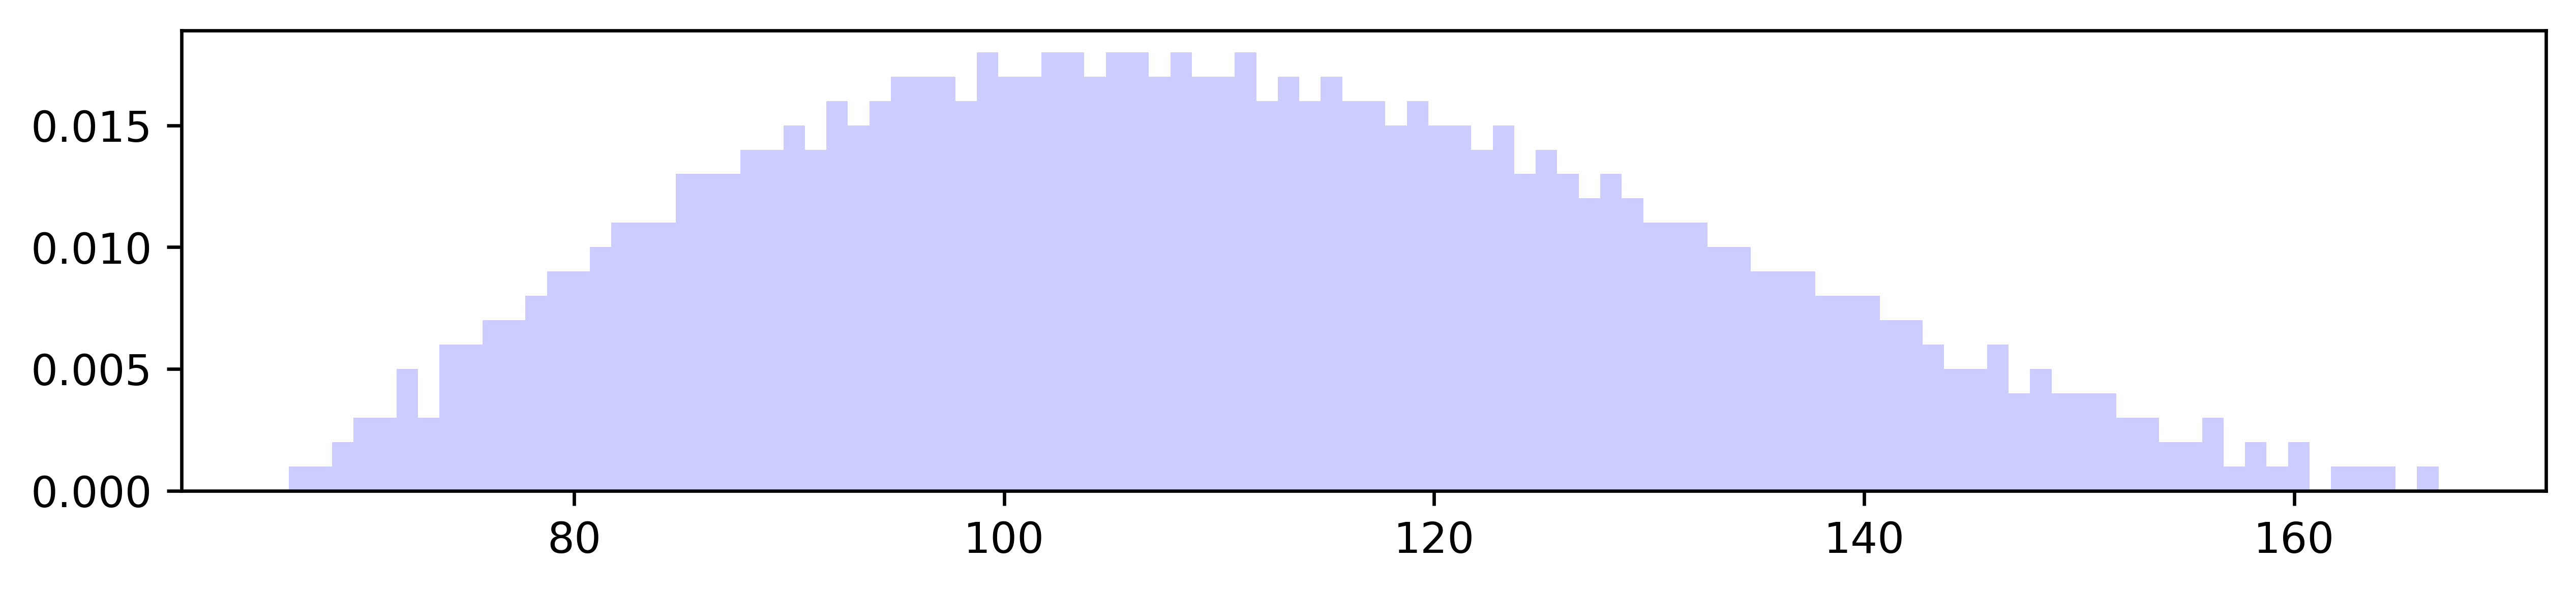

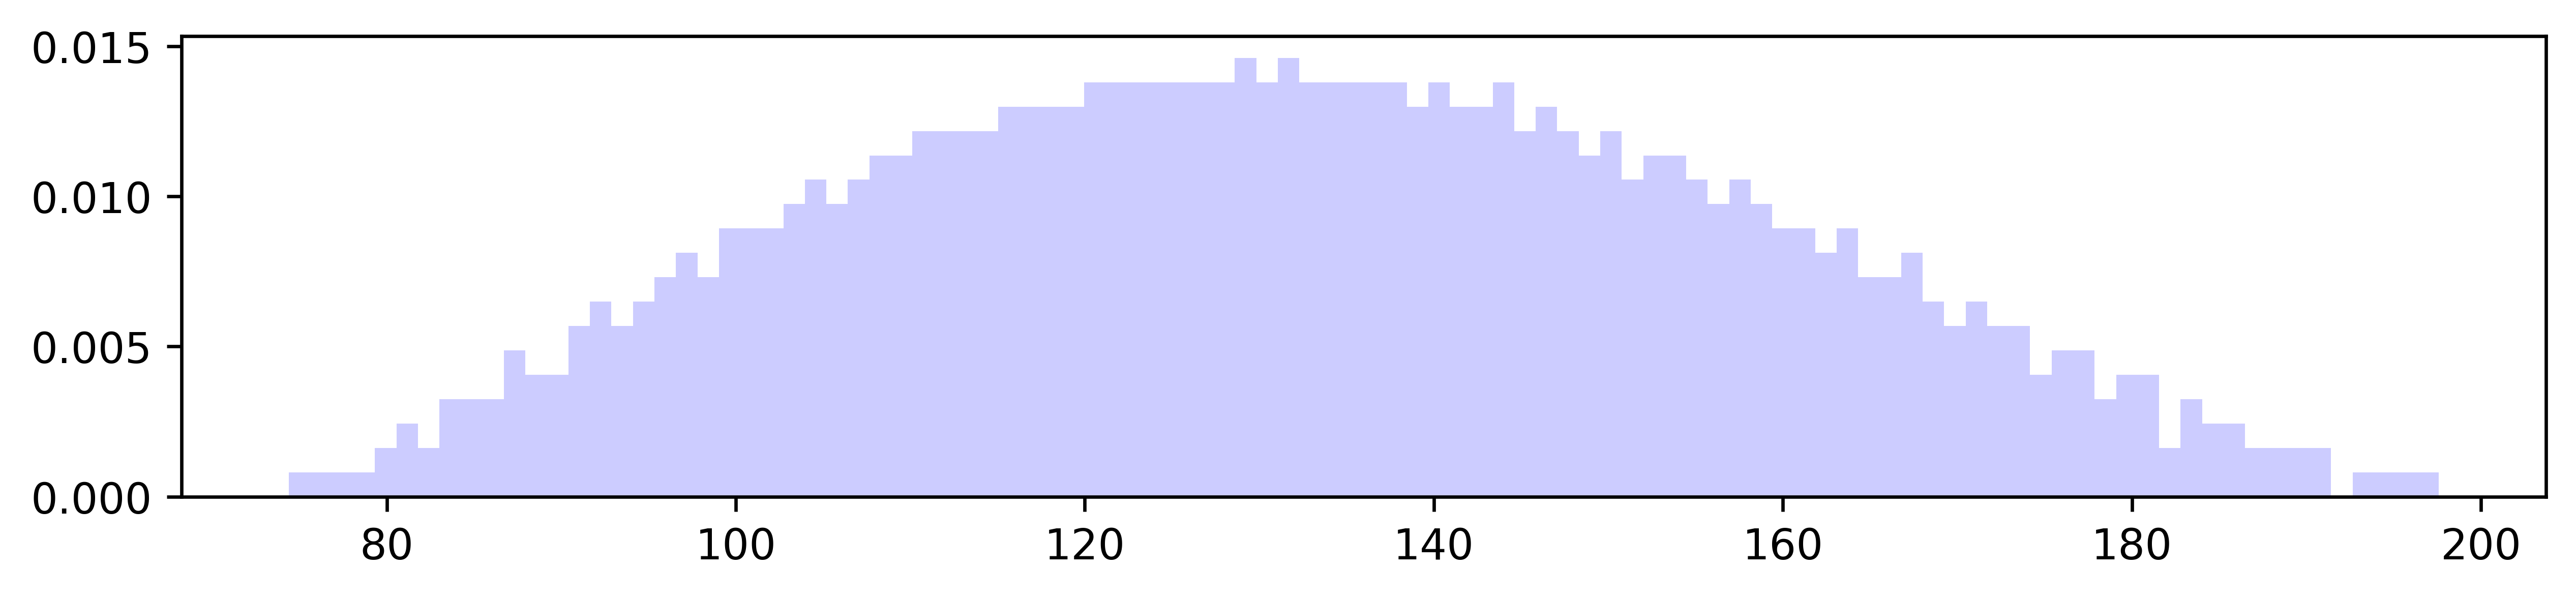

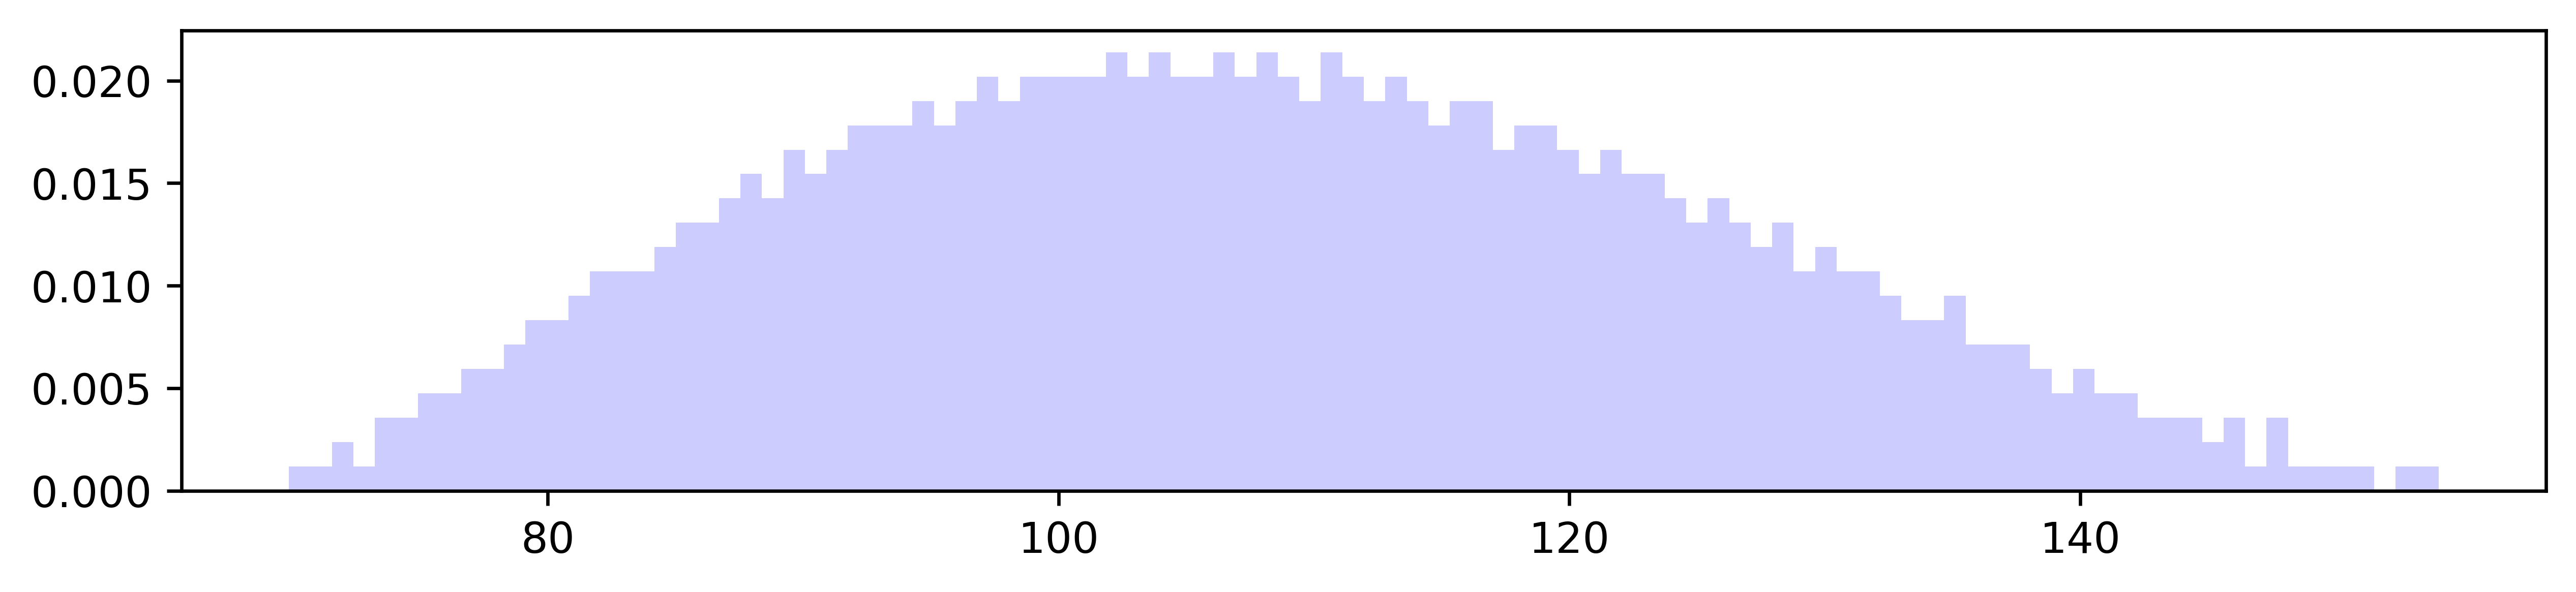

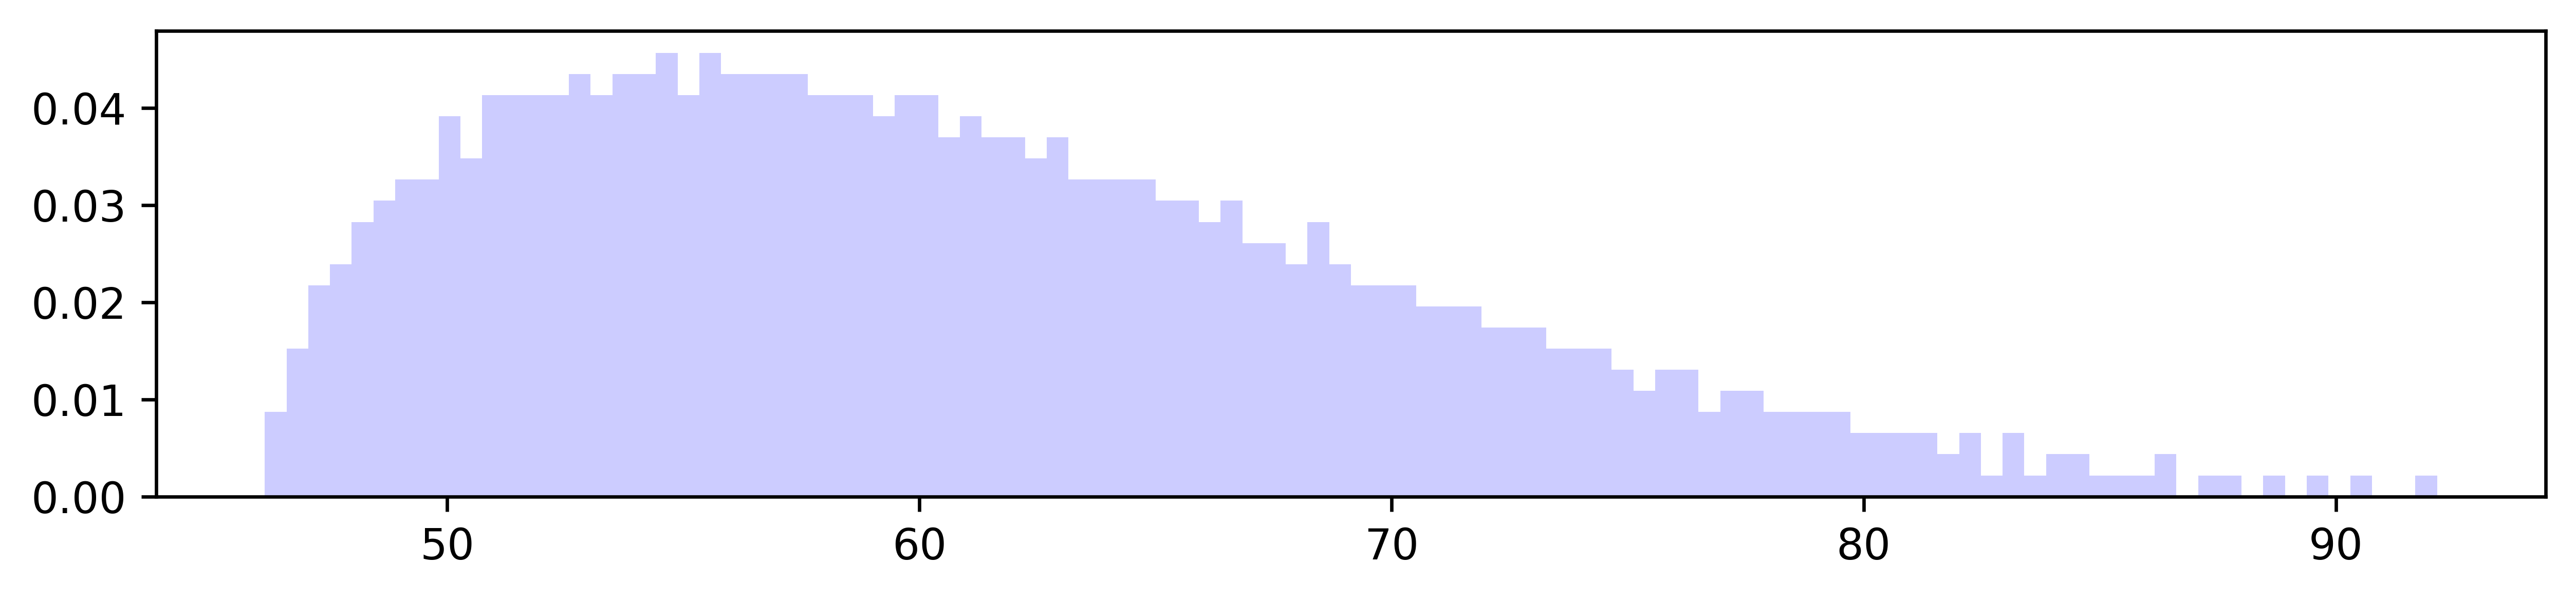

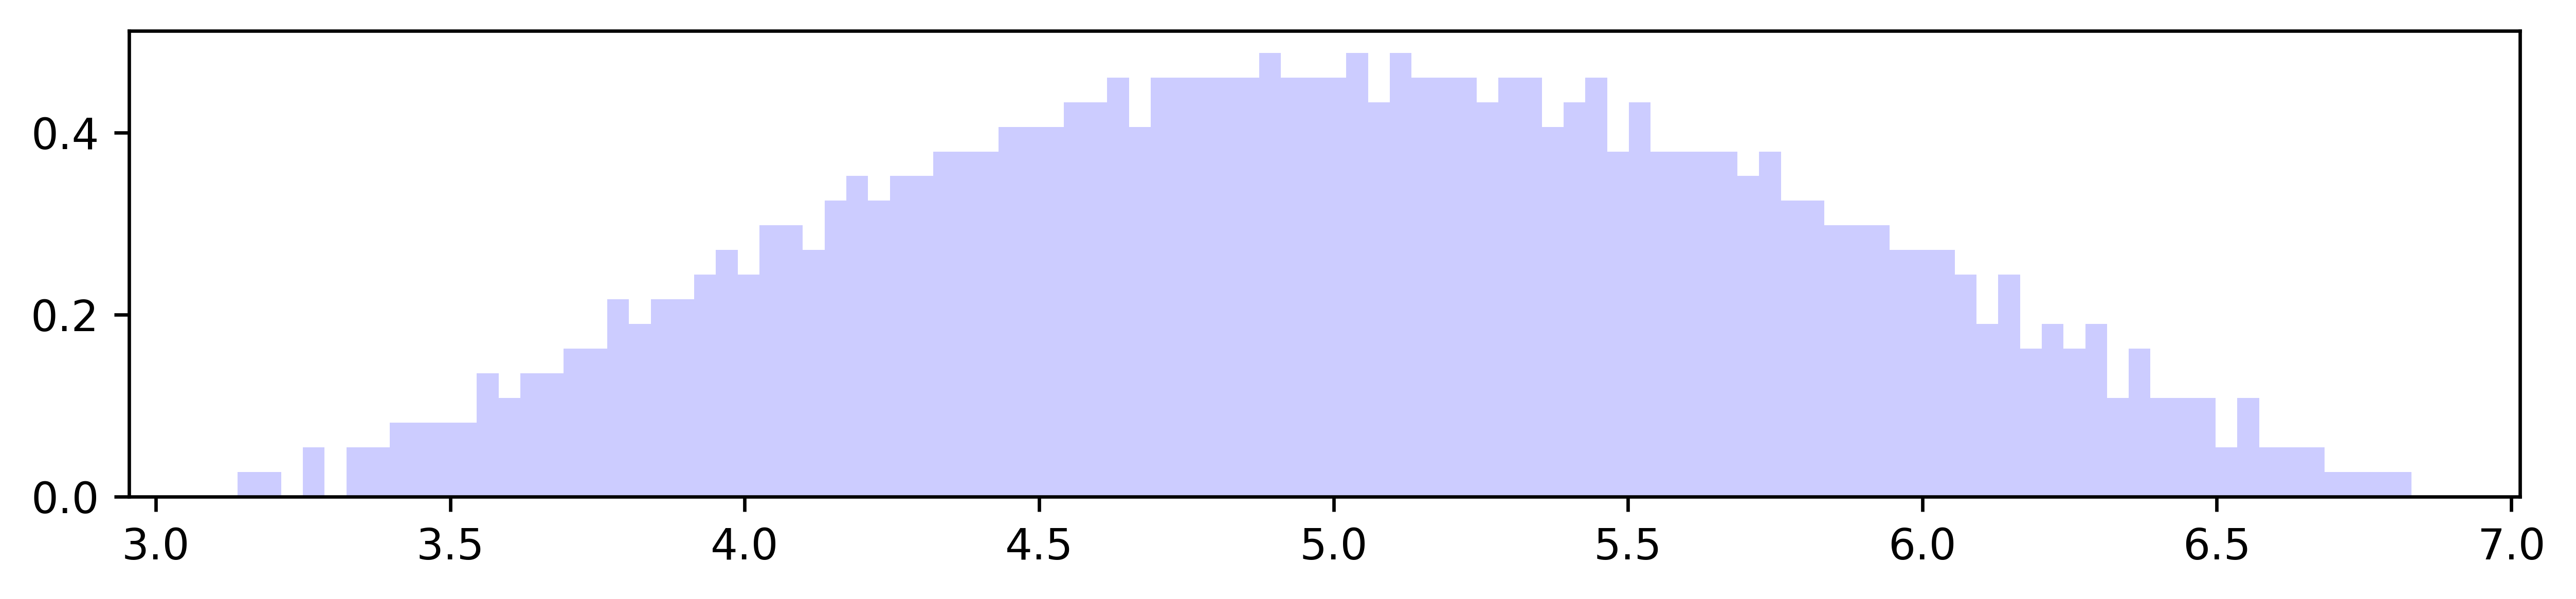

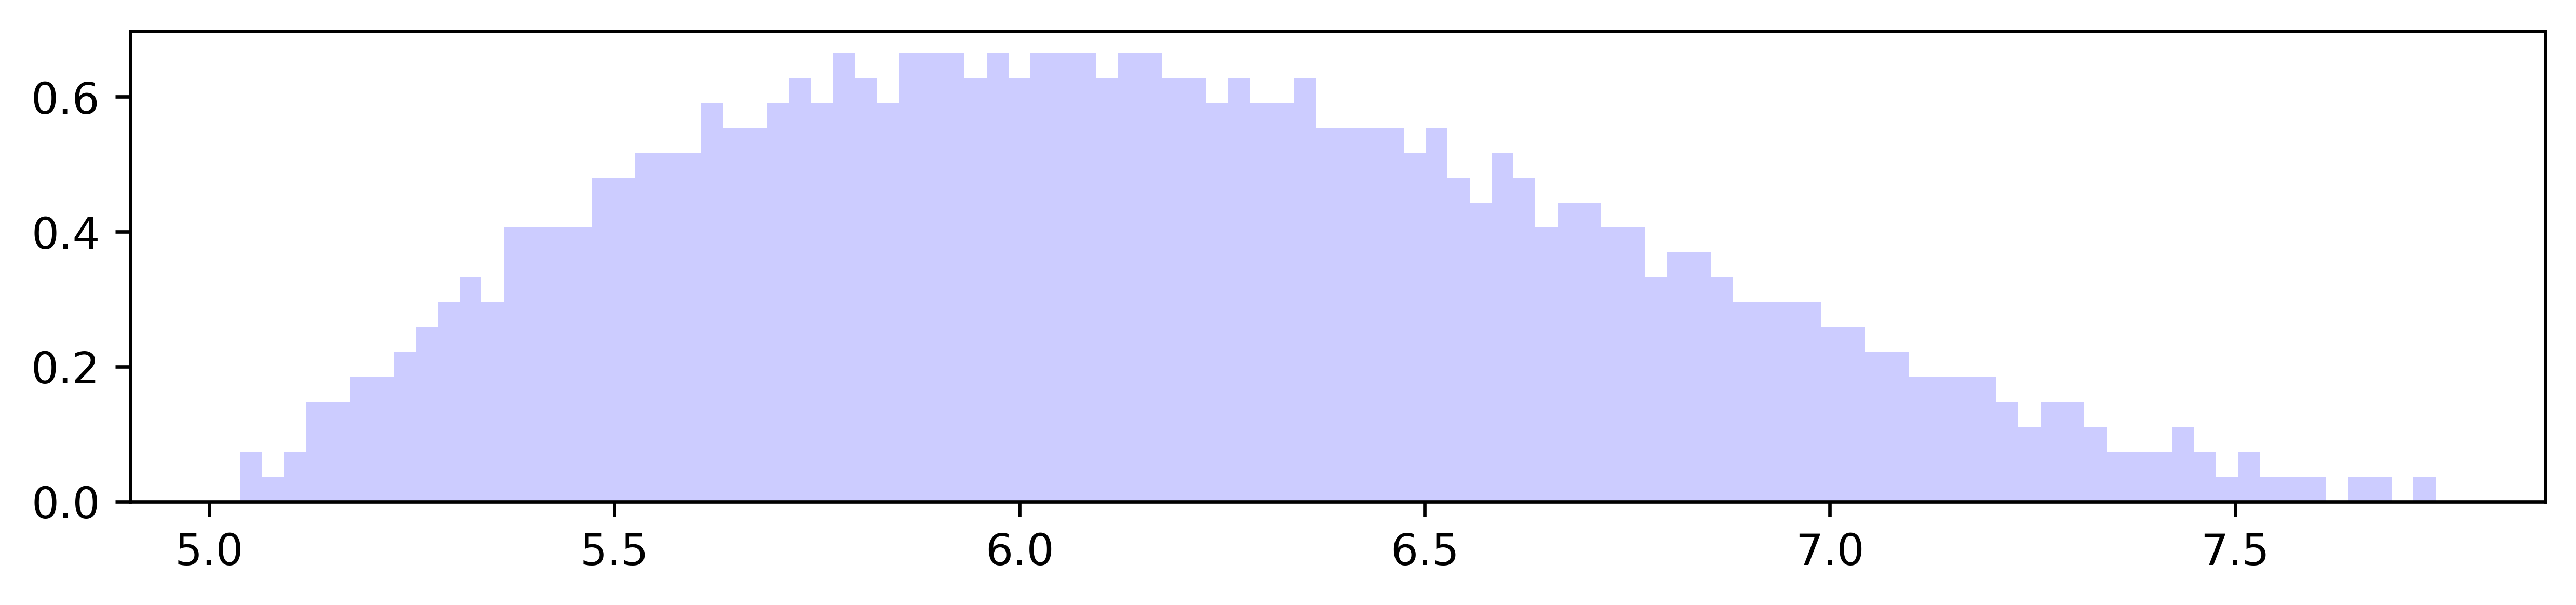

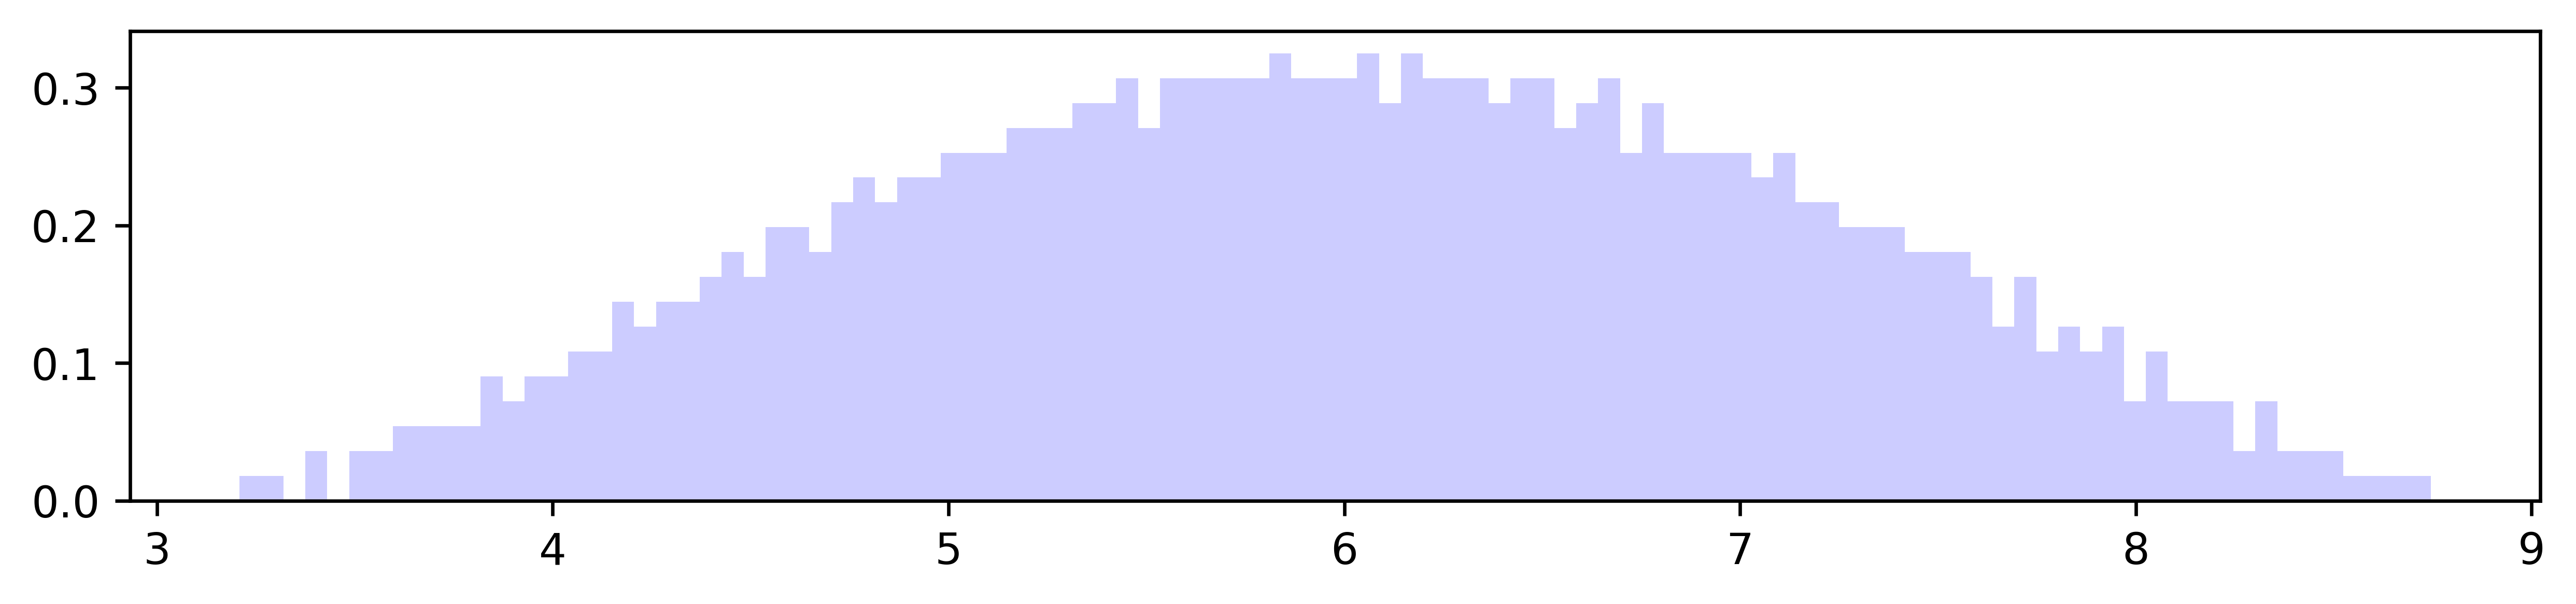

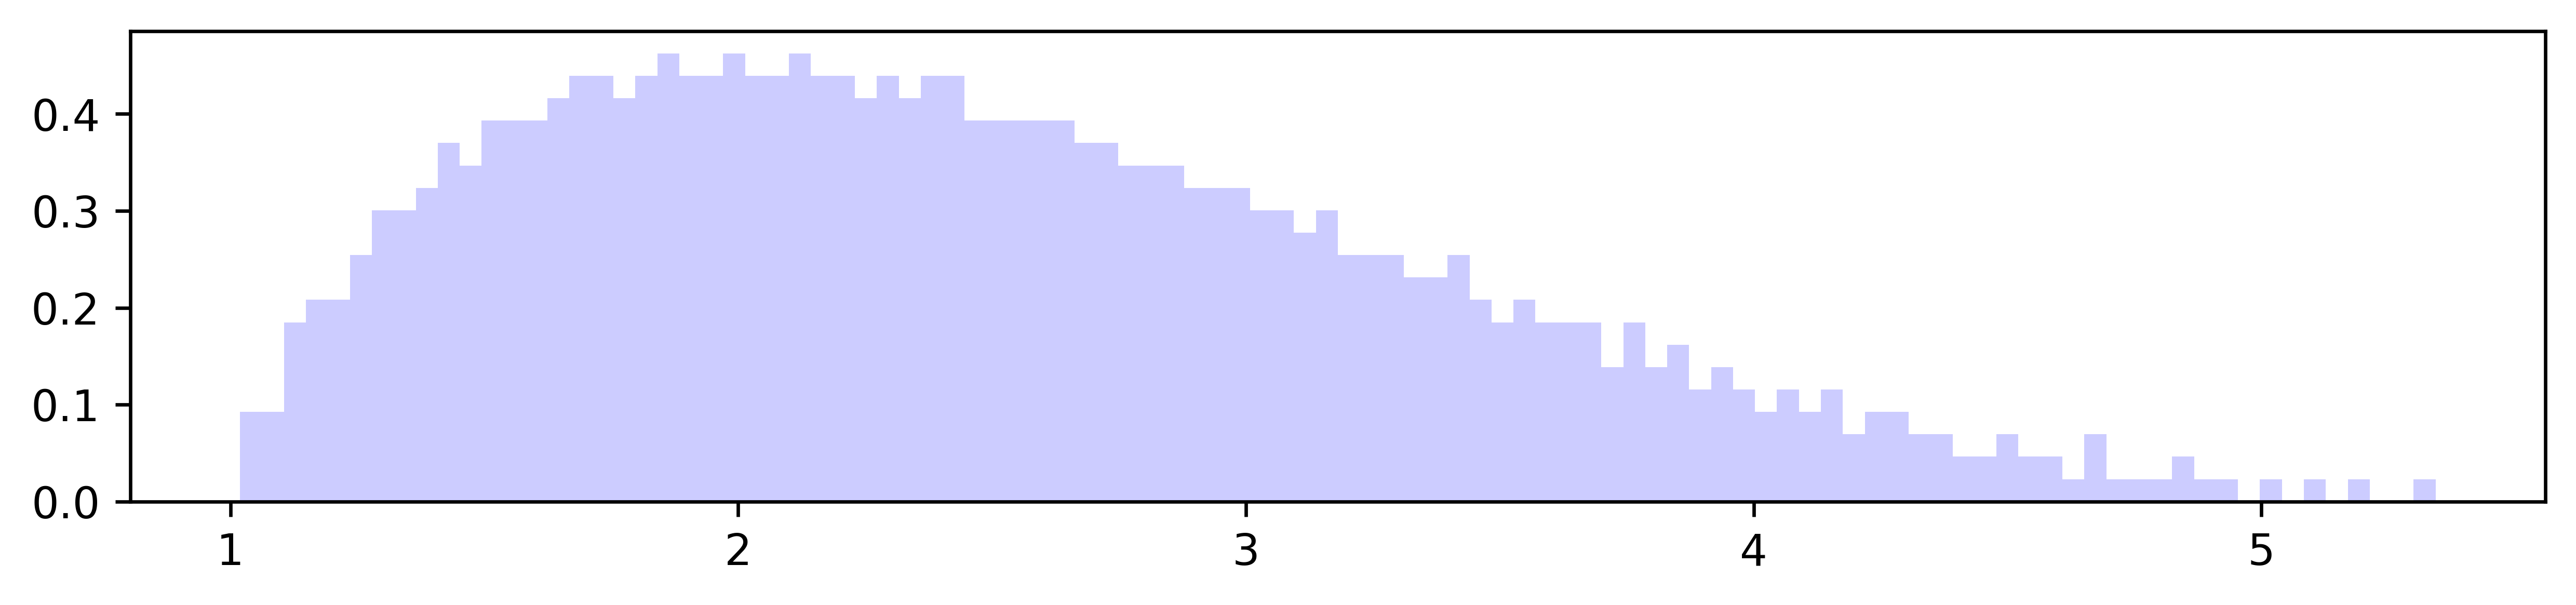

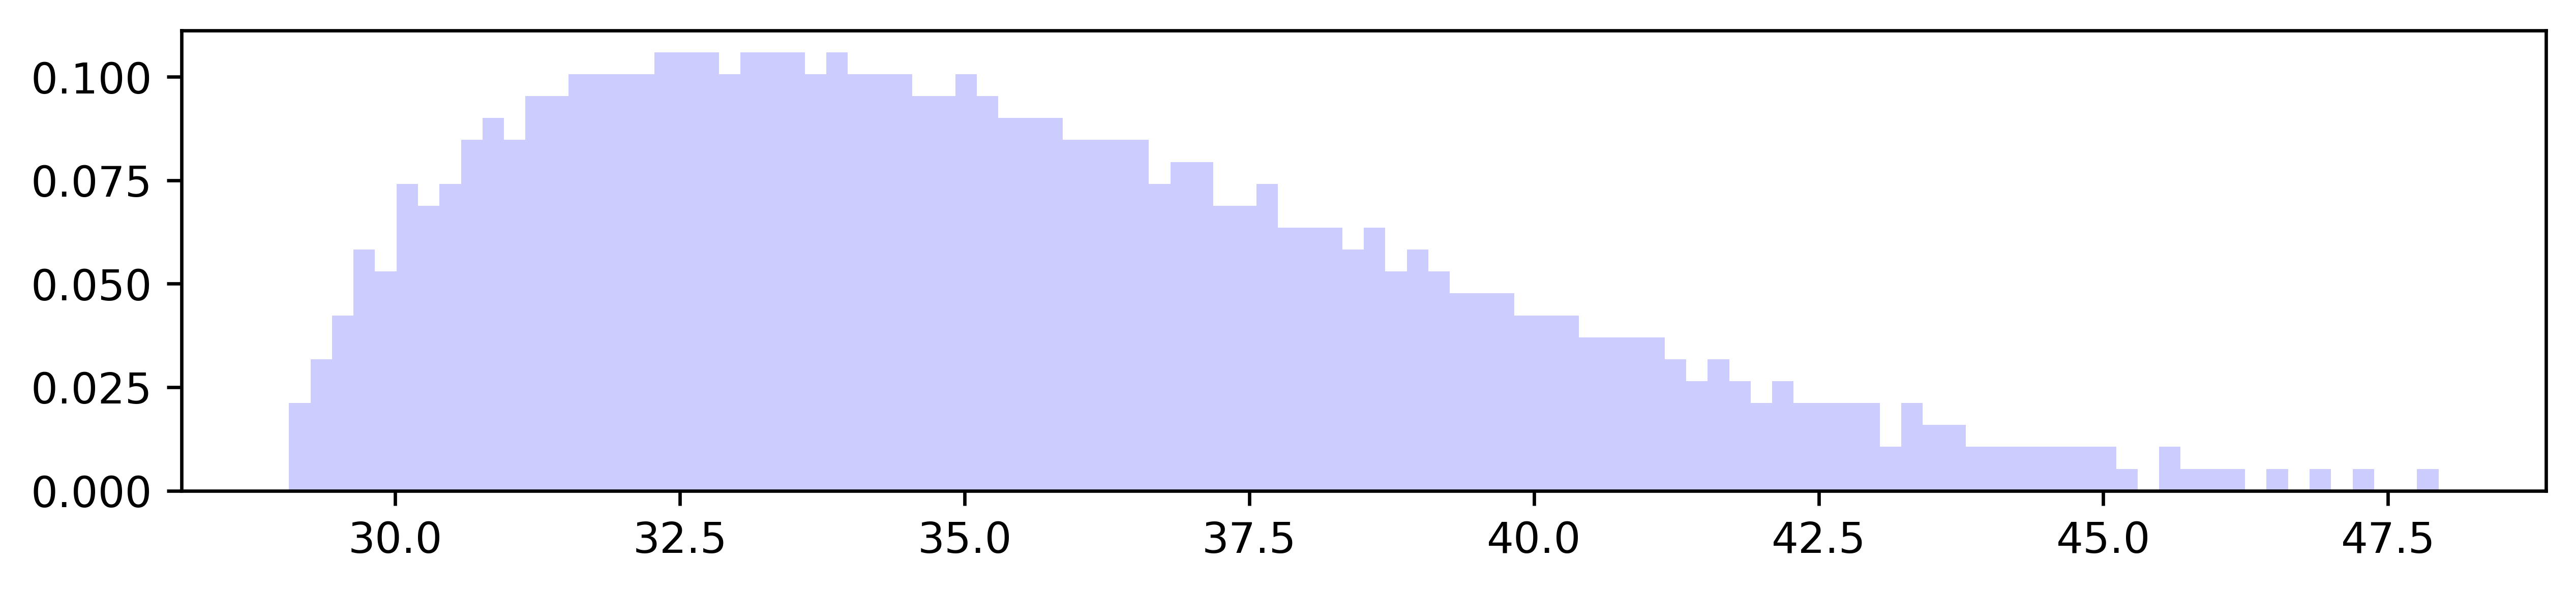

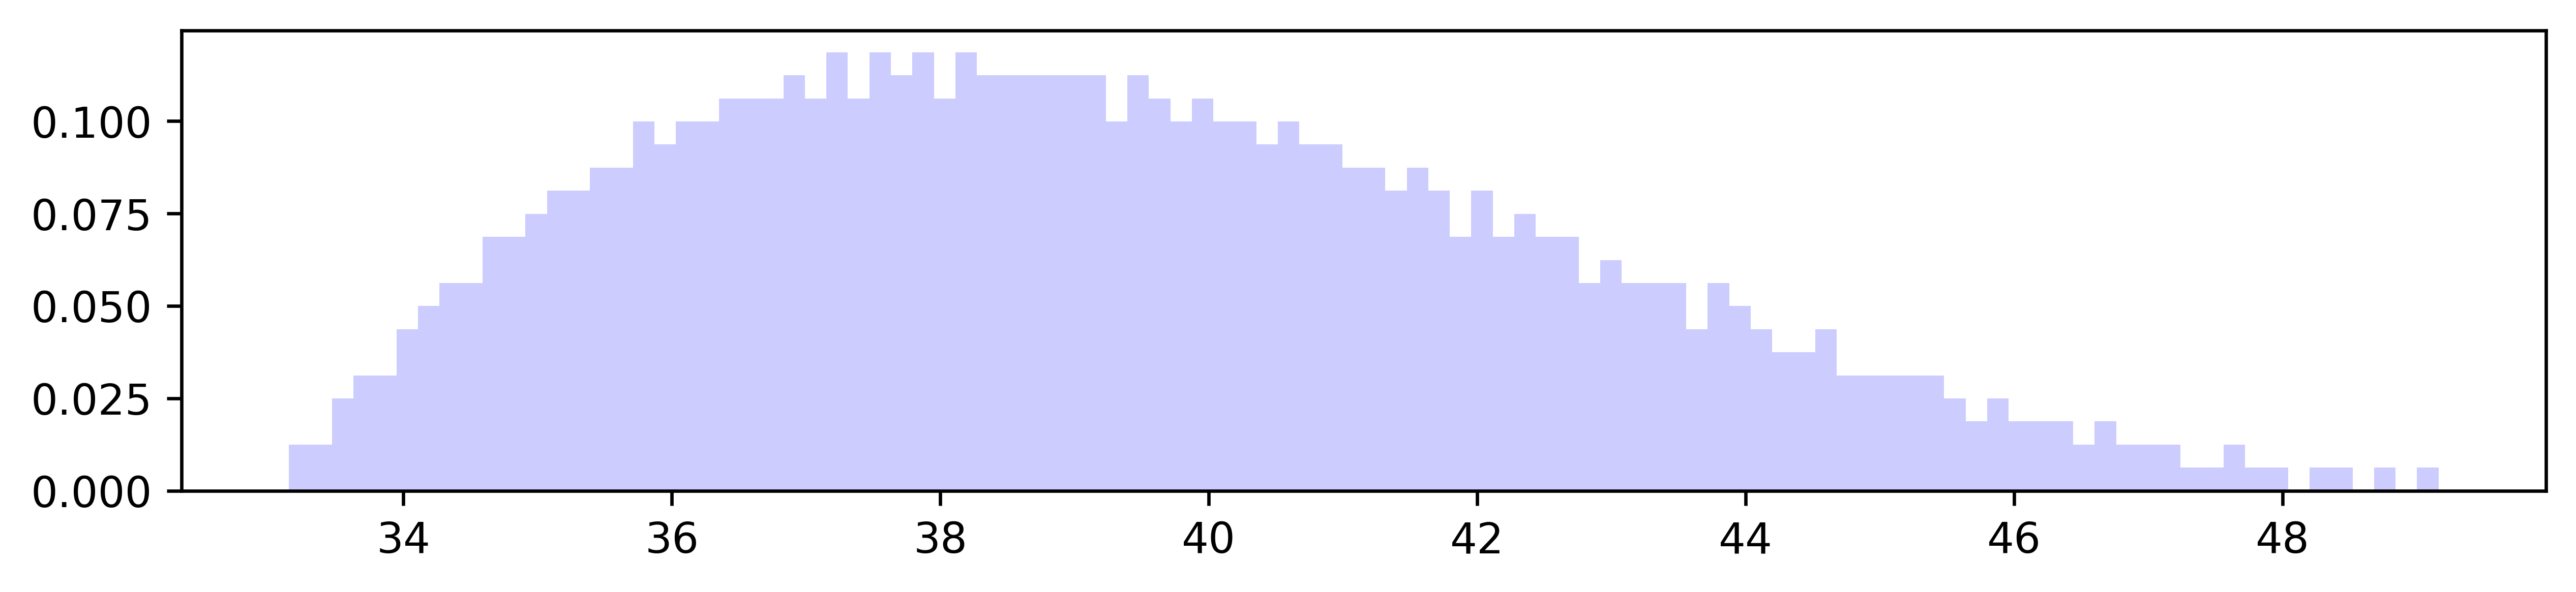

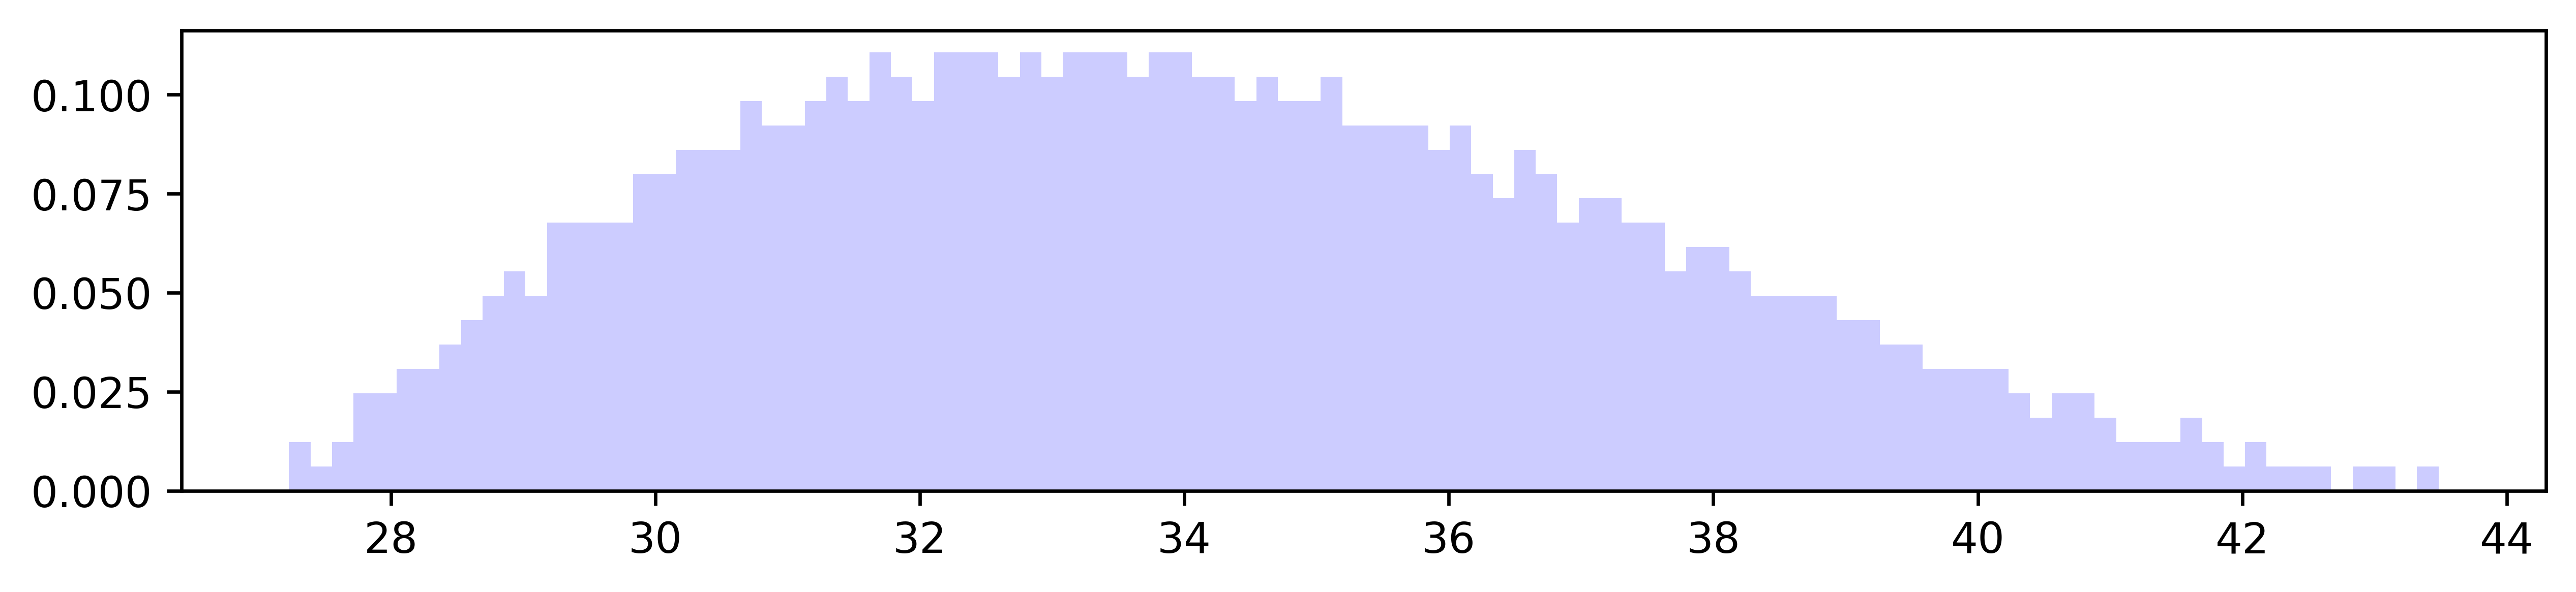

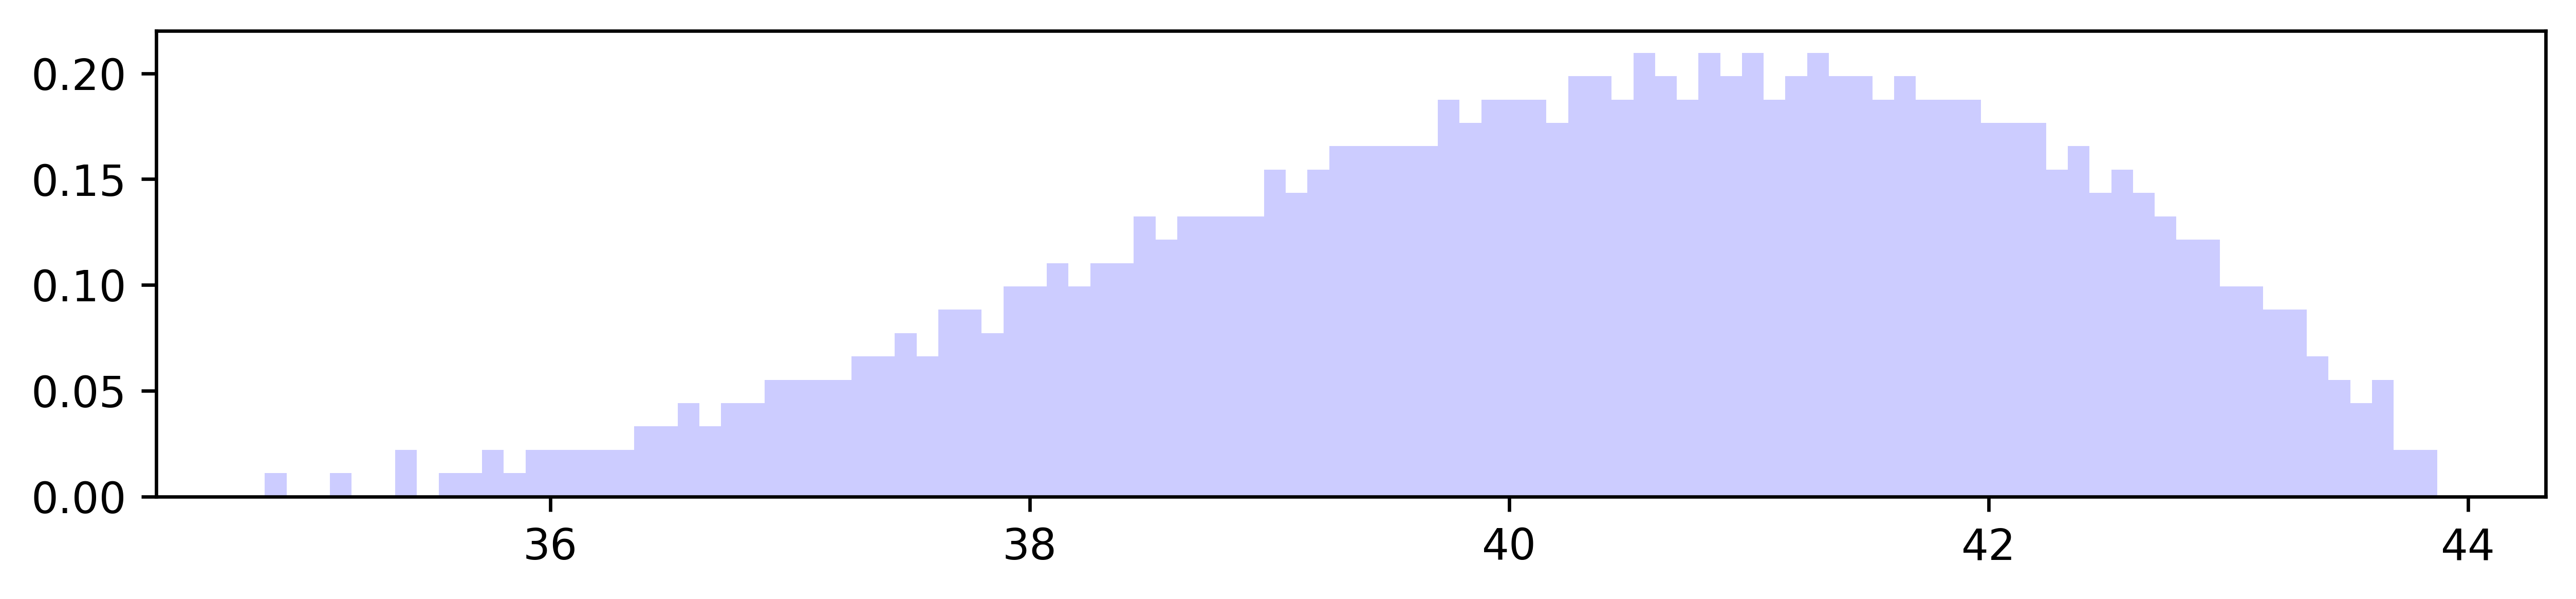

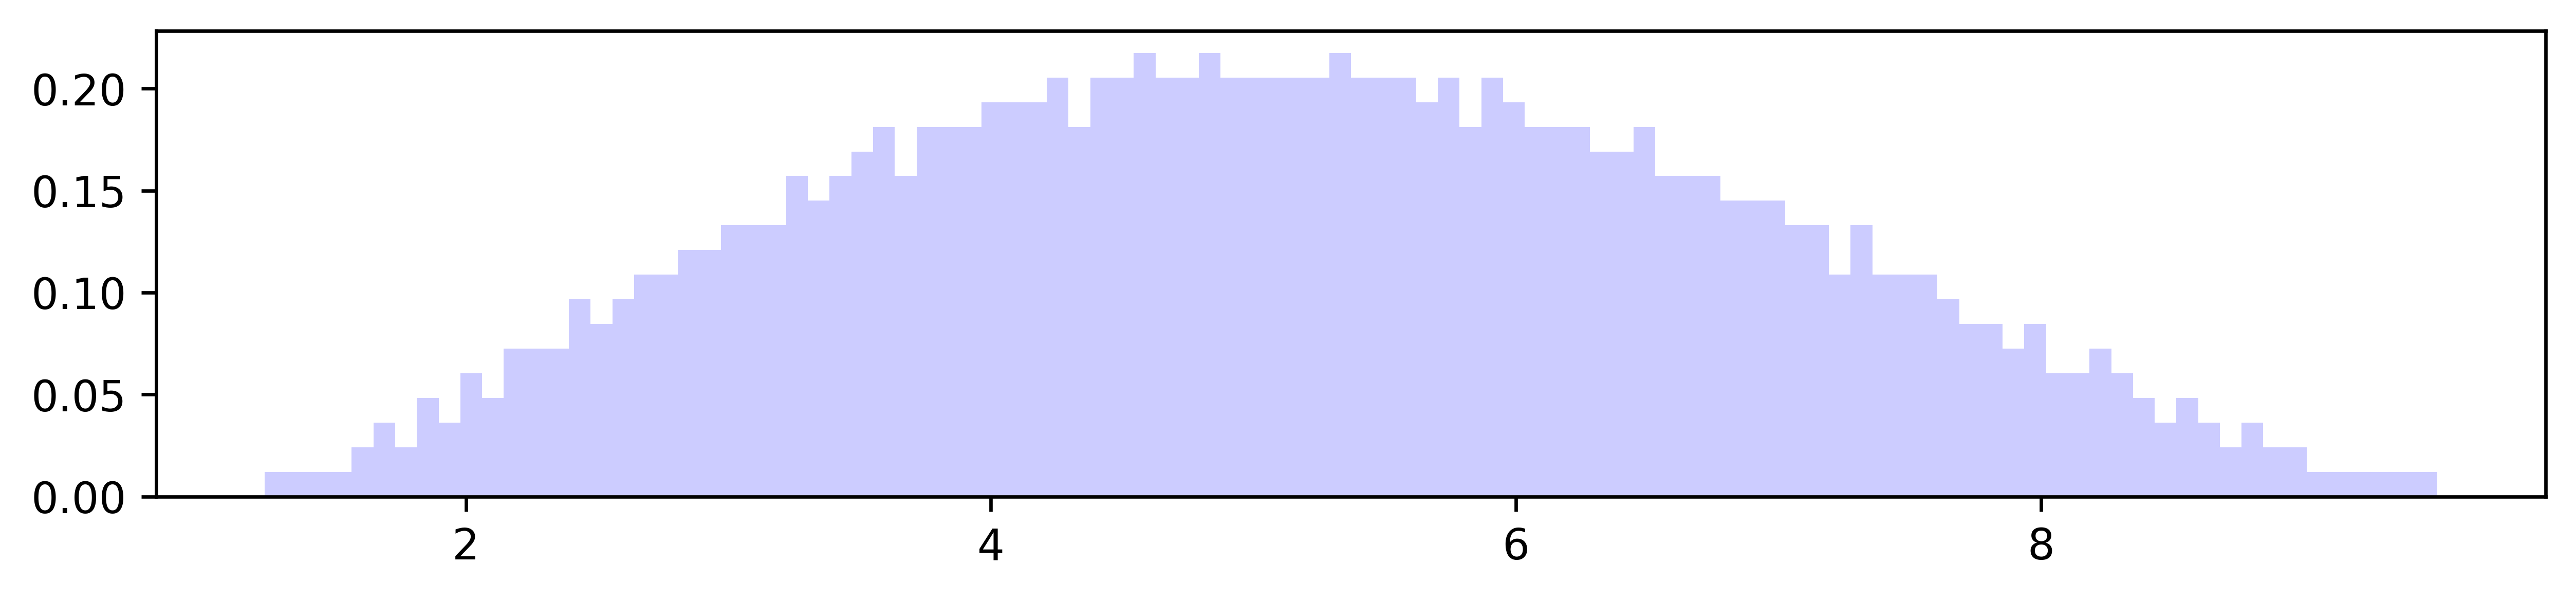

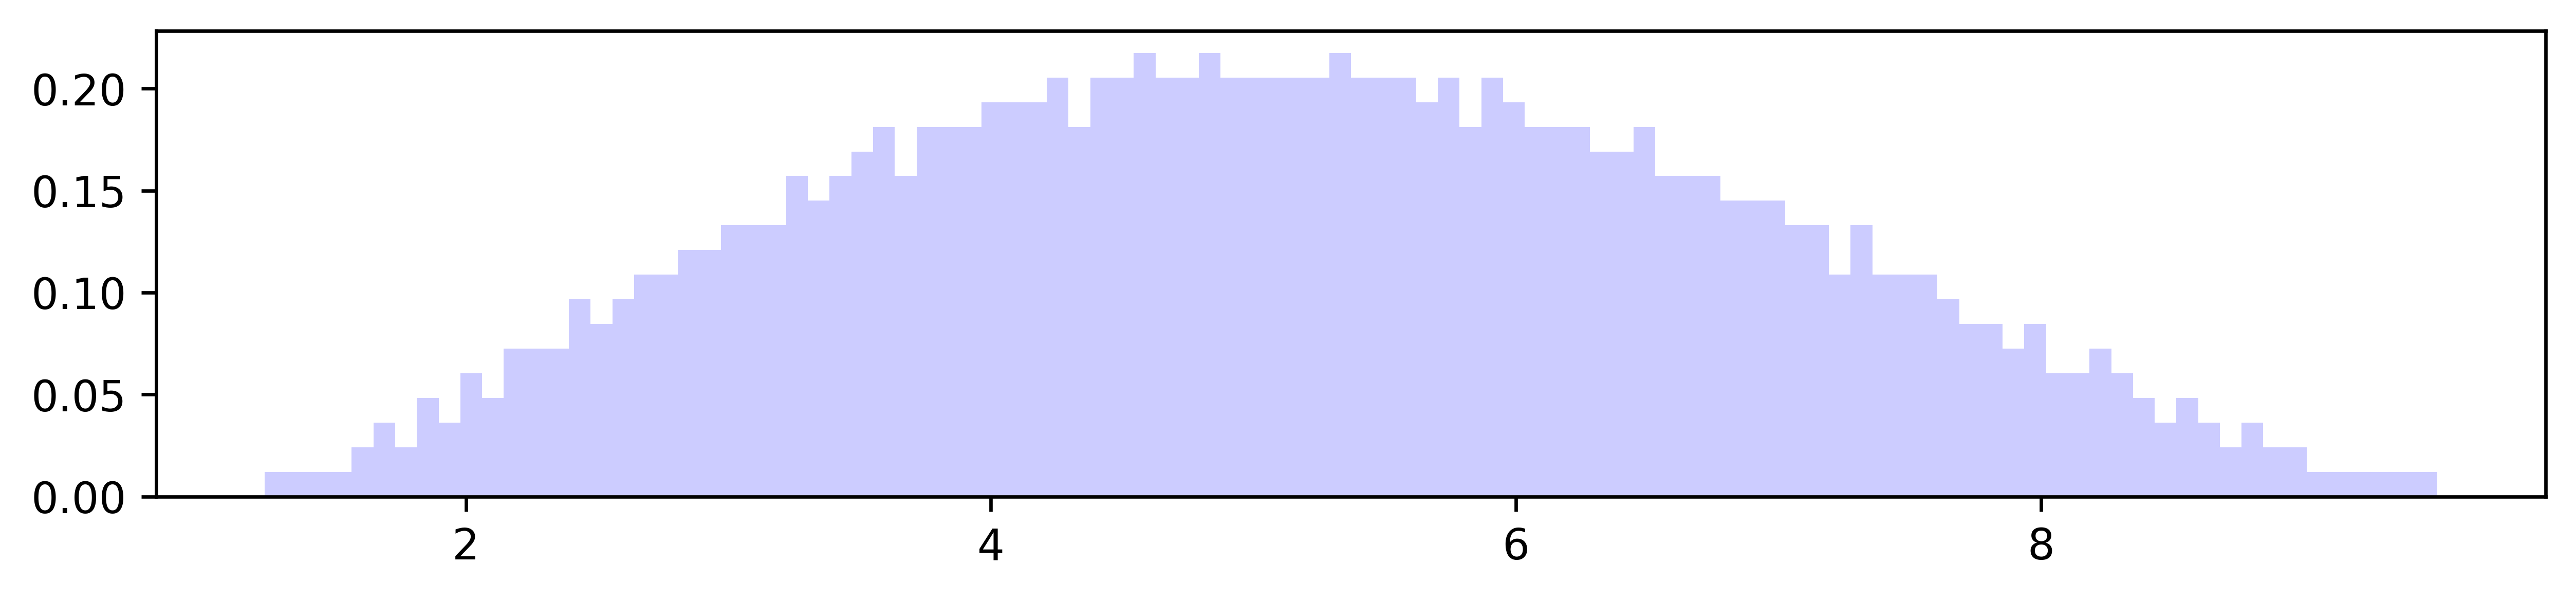

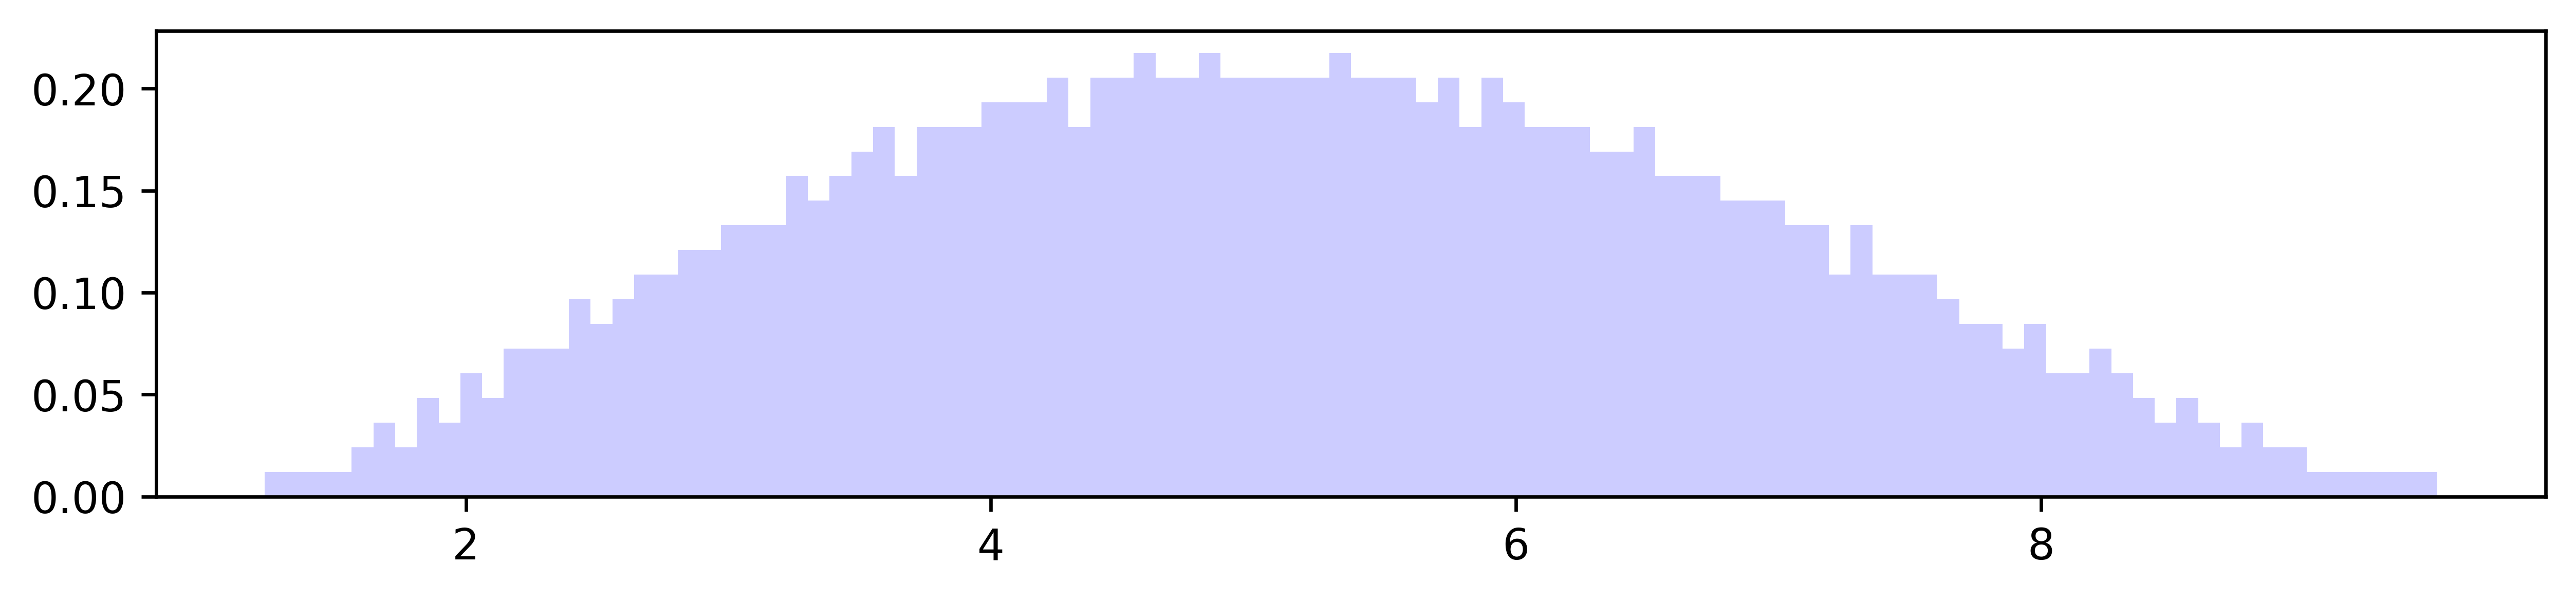

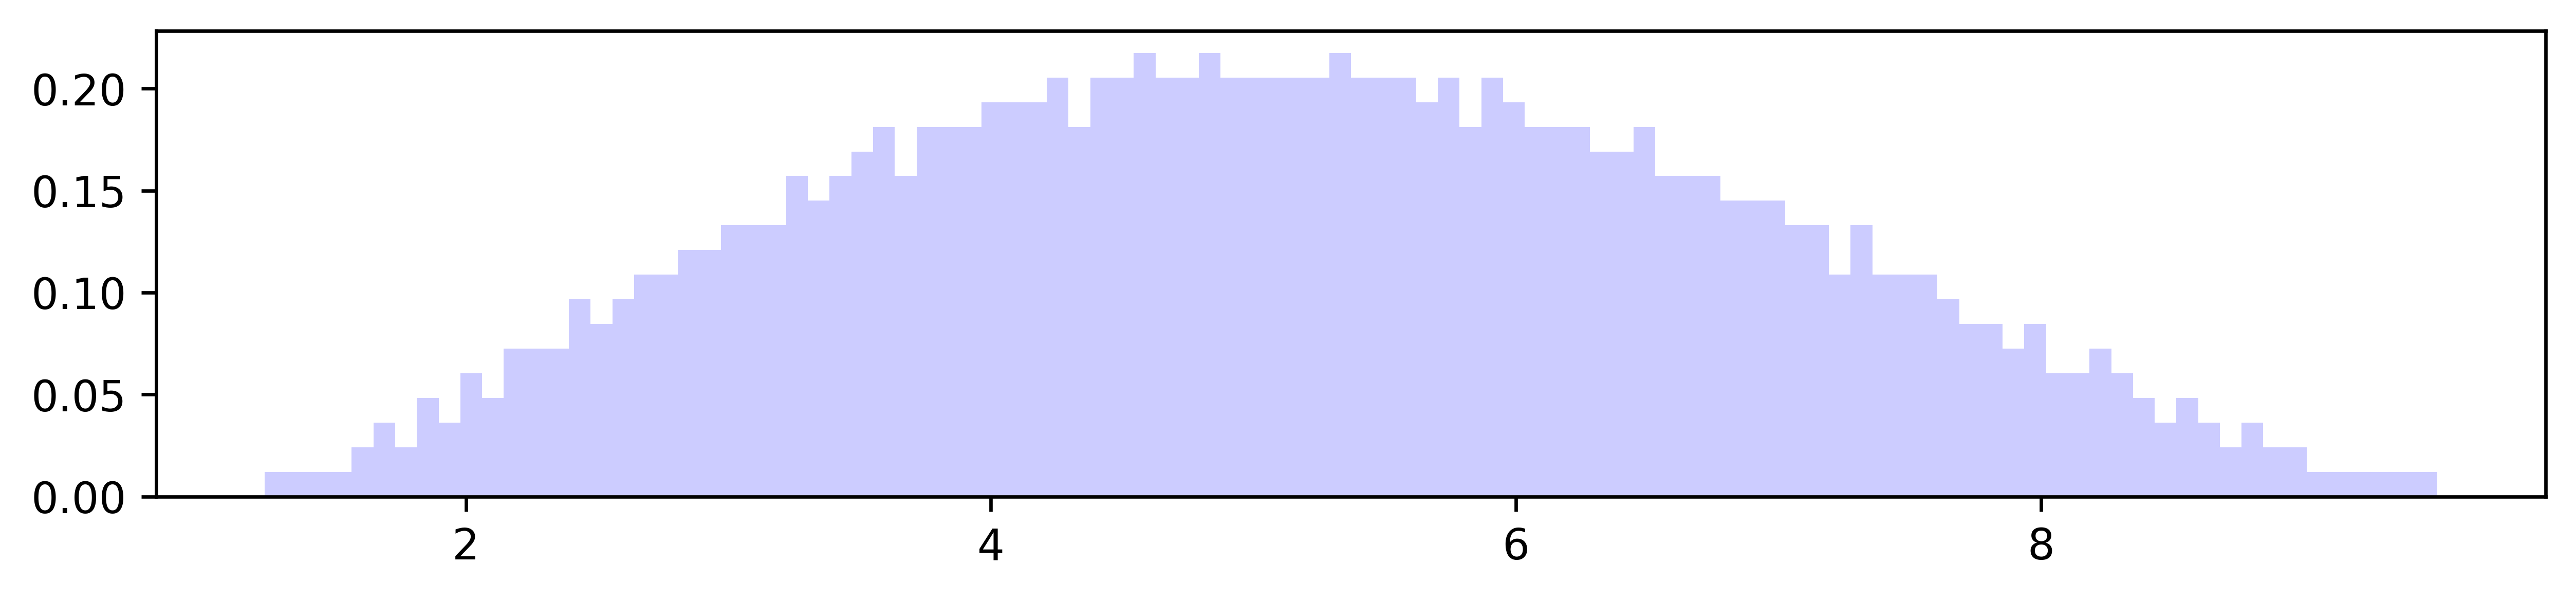

In [ ]:
'''
gamma - Unit Weight of Rock Mass
t - thickness of the failure rock block
JRC - Join Roughness Coefficient
JCS - Joint Wall Compressive Strength
φb - basic friction angle
'''

plt.rcParams['figure.figsize'] = [10, 2]
plt.rcParams["figure.dpi"] = 600
plt.rcParams['savefig.dpi'] = 600

nameIndex = 0
names = ["gma", "jcs", "jrc", "phi_b", "t"]
xnames = ['γ', '$JCS_n$', '$JRC_n$', '$φ_b$', 't']

for varstat in [ gma, jcs, jrc, phi_b, t]:
  for row in [0, 1, 2, 3]:

    min, mode, max, lmb = varstat[row,0], varstat[row,1], varstat[row,2], 4.0
    sampler01 = qmc.LatinHypercube(d=1, seed=42)    # d = dimension
    sample01 = sampler01.random(n=N)
    pertm = pertm_gen(name="pertm")
    rvP = pertm(min,mode,max,lmb) ###
    randP = rvP.ppf(sample01)
    
    fig, ax = plt.subplots(1,1)

    ax.hist(randP, density=True, bins = 100, histtype='stepfilled', alpha=0.2, color='b')

    #plt.title(names[nameIndex]+" simulated distribution ")
    #plt.xlabel(xnames[nameIndex], fontname="Arial")
    #plt.ylabel("Probability Density", fontname="Arial")
    #plt.xlabel("", fontweight='bold')
    #plt.ylabel("", fontweight='bold')

    #plt.show()
    plt.savefig("/content/drive/MyDrive/LHSPlots2/"+names[nameIndex]+str(row)+".jpg")

    #newrow = randP.T
    #newrow.shape
    #ans[row,:] = newrow

  #np.savetxt(names[nameIndex]+".csv", ans, delimiter=",")

  nameIndex=nameIndex+1

In [ ]:
nameIndex = 0
names = ["gma", "jcs", "jrc", "phi_b", "t"]

for varstat in [ gma, jcs, jrc, phi_b, t]:
  for row in [0, 1, 2, 3]:
    min, mode, max, lmb = varstat[row,0], varstat[row,1], varstat[row,2], 4.0
    sampler01 = qmc.LatinHypercube(d=1, seed=42)    # d = dimension
    sample01 = sampler01.random(n=N)
    pertm = pertm_gen(name="pertm")
    rvP = pertm(min,mode,max,lmb) ###
    randP = rvP.ppf(sample01)
    subplotIndex = 4 * nameIndex + row +1
    fig, ax = plt.subplots(1,1)
    ax.hist(randP, density=True, bins = 100, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.title(names[nameIndex]+" for litho index "+str(row))
    plt.show()
    newrow = randP.T
    newrow.shape
    ans[row,:] = newrow
  np.savetxt(names[nameIndex]+".csv", ans, delimiter=",")
  nameIndex=nameIndex+1

# Latin Hypercube Sampling PERT

In [ ]:
# Latin Hypercube LHS sampling of uniform random numbers

sampler = qmc.LatinHypercube(d=1, seed=42)    # d = dimension
sample = sampler.random(n=N) #was 10
print(type(sampler))
#sample

# quality of sample
print(qmc.discrepancy(sample))

# samples can be rescaled to fit between the defined bounds
seq = qmc.scale(sample, 0, 100)
print(type(seq))
#seq

<class 'scipy.stats._qmc.LatinHypercube'>
1.682779966483139e-07
<class 'numpy.ndarray'>


In [ ]:
# create a PERT instance 
# expected sales volume

#min, mode, max, lmb = 8000.0, 12000.0, 18000.0, 4.0
min, mode, max, lmb = xmin, xmode, xmax, 4.0

# instantiate a PERT object
pertm = pertm_gen(name="pertm")
rvP = pertm(min,mode,max,lmb)
statsP = rvP.stats("mvsk")

moments = [np.asscalar(v) for v in statsP]
moment_names = ["mean", "var", "skew", "kurt"]
dict_moments = dict(zip(moment_names, moments))
_ = [print(k,":",f'{v:.2f}') for k,v in dict_moments.items()]

mean : 0.78
var : 0.01
skew : -0.18
kurt : -0.62


No handles with labels found to put in legend.


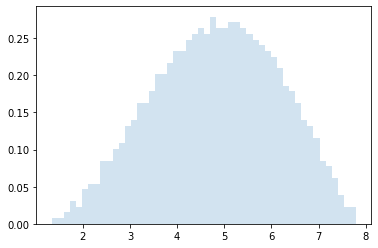

In [ ]:
# PERT random variates with LHS
xmin,xmode,xmax = 1,5,8 ###
min, mode, max, lmb = xmin, xmode, xmax, 4.0 ###
sampler01 = qmc.LatinHypercube(d=1, seed=42)    # d = dimension
sample01 = sampler01.random(n=N)
pertm = pertm_gen(name="pertm")
rvP = pertm(min,mode,max,lmb) ###
randP = rvP.ppf(sample01)

fig, ax = plt.subplots(1, 1)
ax.hist(randP, density=True, bins=50, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
